<h1 style=text-align:center> LOGIKA FUZZY </h1>

<p style=text-align:justify>Logika fuzzy adalah pendekatan untuk pemrosesan data yang mengizinkan penanganan data yang ambigu atau tidak pasti. Dibandingkan dengan logika Boolean tradisional yang hanya memungkinkan nilai benar atau salah, logika fuzzy menerima nilai kebenaran yang berada di antara, menciptakan spektrum nilai antara 0 dan 1. Dalam hal ini, nilai 0 merepresentasikan kesalahan total, 1 merepresentasikan kebenaran total, dan nilai di antara keduanya merepresentasikan berbagai tingkat kebenaran dan ketidakpastian.</p>

In [2]:
pip install scikit-fuzzy

   ---------------------------------------- 0.0/920.8 kB ? eta -:--:--
   ---------------------------------------- 10.2/920.8 kB ? eta -:--:--
   ---------------------------------------- 10.2/920.8 kB ? eta -:--:--
   - ------------------------------------- 30.7/920.8 kB 262.6 kB/s eta 0:00:04
   --- ----------------------------------- 92.2/920.8 kB 525.1 kB/s eta 0:00:02
   ------------ --------------------------- 276.5/920.8 kB 1.3 MB/s eta 0:00:01
   ---------------------- ----------------- 522.2/920.8 kB 2.2 MB/s eta 0:00:01
   ----------------------------- ---------- 686.1/920.8 kB 2.4 MB/s eta 0:00:01
   ---------------------------------------  911.4/920.8 kB 2.9 MB/s eta 0:00:01
   ---------------------------------------- 920.8/920.8 kB 2.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [85]:
from skfuzzy import control as ctrl

<h2 style=text-align:center>PENDEFINISIAN HIMPUNAN FUZZY</h2>

In [86]:
temperature = np.linspace(0,38,39)
temp = ctrl.Antecedent(temperature,'Temperature')

In [99]:
temp

Antecedent: Temperature

In [100]:
temp['cold'] = fuzz.trapmf(temp.universe,[0,0,4,10])
temp['chilly'] = fuzz.trapmf(temp.universe,[4,10,16,21])
temp['warm'] = fuzz.trapmf(temp.universe,[16,21,27,32])
temp['hot'] = fuzz.trapmf(temp.universe,[27,32,38,38])

<b>Langkah pertama dalam penerapan logika fuzzy adalah mendefinisikan himpunan fuzzy. Sebuah himpunan fuzzy adalah himpunan yang anggotanya memiliki tingkat keanggotaan. Misalnya, kita bisa memiliki himpunan fuzzy suhu dengan anggota ‘dingin’, ‘hangat’, dan ‘panas’, masing-masing dengan tingkat keanggotaan yang berbeda.

c:\Users\Dell\anaconda3\envs\tensorflowgpu\lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


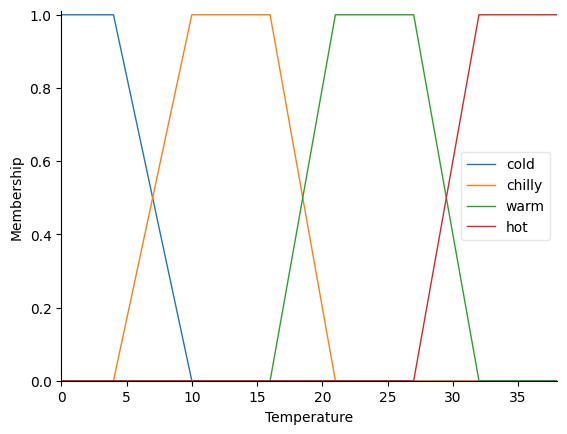

In [133]:
temp.view()

In [101]:
water_temperature = np.linspace(10,40,31)
water_temp = ctrl.Consequent(water_temperature,'water_temperature')

In [102]:
print(water_temperature)

[10. 11. 12. 13. 14. 15. 16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27.
 28. 29. 30. 31. 32. 33. 34. 35. 36. 37. 38. 39. 40.]


In [103]:
water_temp['hot'] = fuzz.trapmf(water_temp.universe,[26,31,40,40])
water_temp['warm'] = fuzz.trapmf(water_temp.universe,[19,24,26,31])
water_temp['chilly'] = fuzz.trapmf(water_temp.universe,[14,17,19,24])
water_temp['cold'] = fuzz.trapmf(water_temp.universe,[10,10,14,17])

c:\Users\Dell\anaconda3\envs\tensorflowgpu\lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


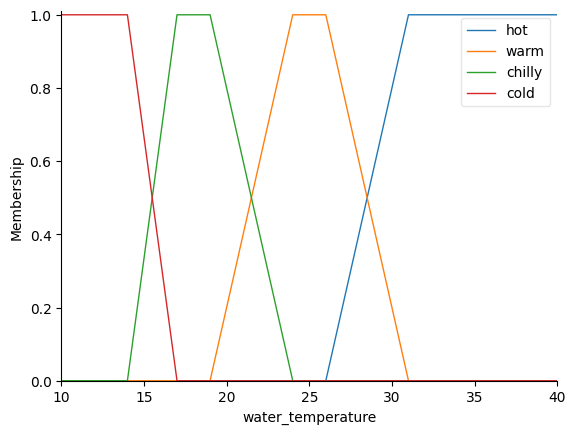

In [134]:
water_temp.view()

<h2 style=text-align:center>PENERAPAN ATURAN FUZZY</h2>


In [109]:
rule1 = ctrl.Rule(temp['cold'], water_temp['hot'])
rule2 = ctrl.Rule(temp['chilly'], water_temp['warm'])
rule3 = ctrl.Rule(temp['warm'], water_temp['chilly'])
rule4 = ctrl.Rule(temp['hot'], water_temp['cold'])

<b>Aturan fuzzy adalah aturan logis yang digunakan untuk membuat keputusan berdasarkan himpunan fuzzy. Misalnya, aturan mungkin berbunyi “Jika suhu adalah panas, maka menyalakan AC”.

<b>Create fuzzy control system

In [110]:
water_temp_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
water_temp_sim = ctrl.ControlSystemSimulation(water_temp_ctrl)

<b>Fuzzification:

Convert crisp (exact) input data into fuzzy sets using membership functions.
Determine the degree of membership of each input value in the appropriate fuzzy sets.

In [135]:
water_temp_sim.input['Temperature']= 15
water_temp_sim.compute()

<b>Defuzzifikasi: Setelah aturan fuzzy diterapkan, langkah selanjutnya adalah defuzzifikasi, yang merupakan proses konversi output fuzzy menjadi nilai tegas yang dapat digunakan oleh sistem.

In [136]:
print("Water Temperature: ", water_temp_sim.output['water_temperature'])

Water Temperature:  25.0
